In [1]:
#To access python data science libraries and visualise data and render plots in the Jupyter Notebook
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
import datetime as dt
%matplotlib inline

In [2]:
#Save the list of all csv files
csv1 = pd.read_csv('data1_cleaned.csv')
csv2 = pd.read_csv('data2_cleaned.csv')
csv3 = pd.read_csv('data3_cleaned.csv')
csv4 = pd.read_csv('data4_cleaned.csv')

In [3]:
#Merged all files in the list based on matching 'customer id' column
csv1_2 = pd.merge(csv1, csv2, on=['customer_id'])
csv1_2_3 = pd.merge(csv1_2, csv3, on=['customer_id'])

In [4]:
#Export to csv
csv1_2_3.to_csv( "merged.csv", index=False, encoding='utf-8-sig')

In [5]:
#Ascending order
df = csv1_2_3.sort_values(by=['customer_id'])

In [6]:
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-27,0.0,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,2017-05-19,0.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-03-14,1.0,Approved,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-02-16,0.0,Approved,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-01-11,0.0,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,2017-01-09,1.0,Approved,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19968 entries, 88 to 4637
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          19968 non-null  int64  
 1   first_name                           19968 non-null  object 
 2   last_name                            19326 non-null  object 
 3   gender                               19968 non-null  object 
 4   past_3_years_bike_related_purchases  19968 non-null  int64  
 5   dob                                  19522 non-null  object 
 6   job_title                            19968 non-null  object 
 7   job_industry_category                19968 non-null  object 
 8   wealth_segment                       19968 non-null  object 
 9   deceased_indicator                   19968 non-null  bool   
 10  owns_car                             19968 non-null  bool   
 11  tenure                      

In [8]:
df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,transaction_id,product_id,online_order,list_price,standard_cost,product_first_sold_date
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000,19794.000000,19968.000000
mean,1740.254307,48.757412,10.689052,2987.623347,7.516376,9997.846504,45.365986,0.501102,1107.780004,556.082756,38198.751474
std,1009.819066,28.611359,5.611093,851.306647,2.824783,5773.929973,30.750115,0.500011,582.852548,405.798188,2860.784340
min,1.000000,0.000000,1.000000,2000.000000,1.000000,1.000000,0.000000,0.000000,12.010000,7.210000,33259.000000
25%,861.750000,24.000000,6.000000,2200.000000,6.000000,4997.750000,18.000000,0.000000,575.270000,215.140000,35667.000000
50%,1739.500000,48.000000,11.000000,2767.000000,8.000000,9996.500000,44.000000,1.000000,1163.890000,507.580000,38206.000000
75%,2614.250000,73.000000,15.000000,3754.000000,10.000000,14996.250000,72.000000,1.000000,1635.300000,795.100000,40672.000000
max,3500.000000,99.000000,22.000000,4883.000000,12.000000,20000.000000,100.000000,1.000000,2091.470000,1759.850000,42710.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              642
gender                                   0
past_3_years_bike_related_purchases      0
dob                                    446
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
transaction_id                           0
product_id                               0
transaction_date                         0
online_order                             0
order_status                             0
brand                                    0
product_lin

In [11]:
df['last_name'].fillna(method='ffill', inplace = True)

In [12]:
df['dob'].fillna(method='ffill', inplace = True)

In [13]:
df.standard_cost.mode()

0    388.92
dtype: float64

In [14]:
df.standard_cost.mean()

556.082755885636

In [15]:
df['standard_cost'].fillna(df['standard_cost'].mean(), inplace = True)

In [16]:
df.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
dob                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class   

In [17]:
df['dob'] = df['dob'].apply(pd.to_datetime)

In [18]:
df.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                               bool
owns_car                                         bool
tenure                                        float64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
transaction_id                                  int64
product_id                  

In [19]:
ref_date = dt.datetime.now()
df['Age'] = df['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date, freq = 'Y')))

In [20]:
df = df[df.Age < 100]

In [21]:
df['transaction_month'] = pd.DatetimeIndex(df['dob']).month

/Users/mankityip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
df['profit'] = df['list_price'] - df['standard_cost']

/Users/mankityip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
88,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,67,10,189.28
85,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Norco Bicycles,Mountain,low,small,688.63,612.88,33455.0,67,10,75.75
86,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Standard,high,medium,1274.93,764.96,35378.0,67,10,509.97
87,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Solex,Standard,medium,medium,1577.53,826.51,39526.0,67,10,751.02
89,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,False,...,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552.0,67,10,709.34


In [24]:
df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,...,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Age,transaction_month,profit
4636,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,OHM Cycles,Standard,high,medium,1458.17,874.90,38750.0,53,7,583.27
4635,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,1228.07,400.91,36668.0,53,7,827.16
4634,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,WeareA2B,Standard,medium,medium,60.34,45.26,34165.0,53,7,15.08
4633,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,Giant Bicycles,Road,medium,medium,792.90,594.68,33879.0,53,7,198.22
4637,3500,Josy,Fleeman,Female,71,1967-07-21,Administrative Officer,Entertainment,Affluent Customer,False,...,Solex,Standard,medium,medium,71.49,53.62,41245.0,53,7,17.87


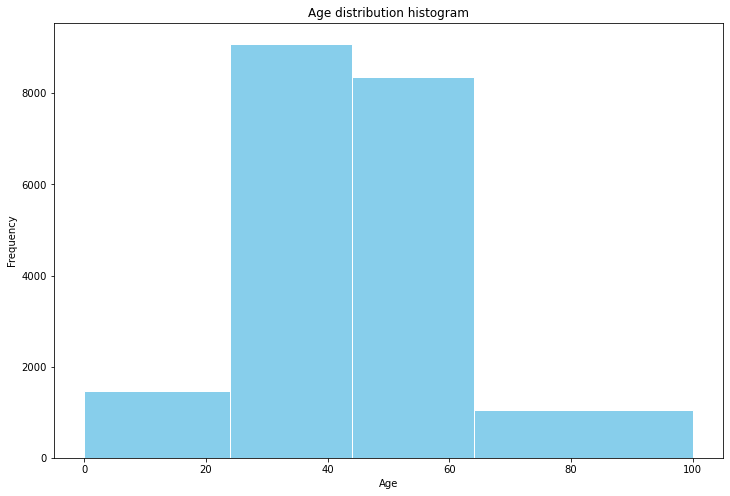

In [25]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(df['Age'], color = 'skyblue', edgecolor = 'white', bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram.png')
plt.show()

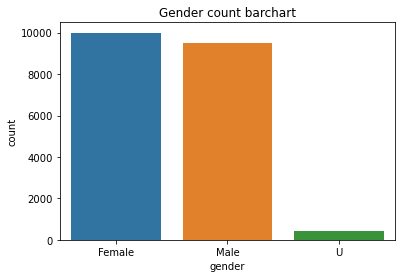

In [26]:
sn.countplot(x = 'gender', data = df)
plt.title('Gender count barchart')
plt.savefig('gender_count_original.png')
plt.show()

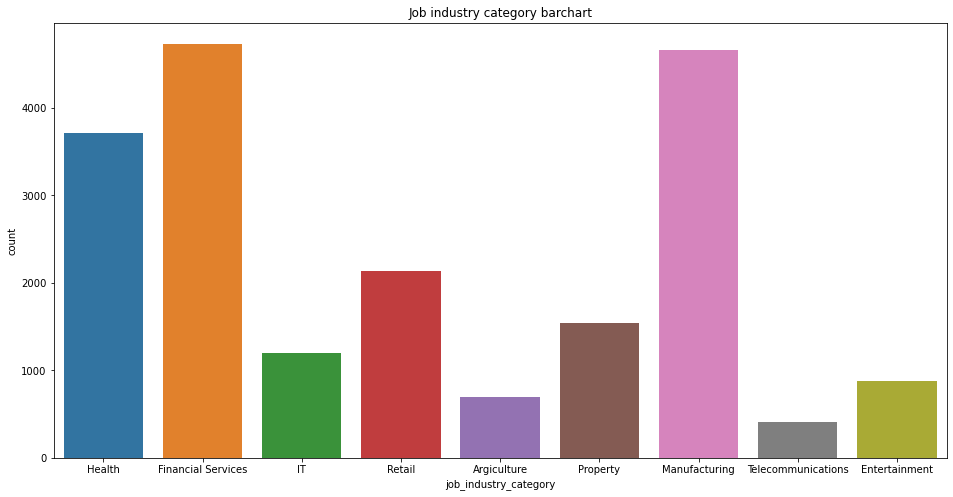

In [27]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df)
plt.title('Job industry category barchart')
plt.savefig('job_industry_original.png')
plt.show()

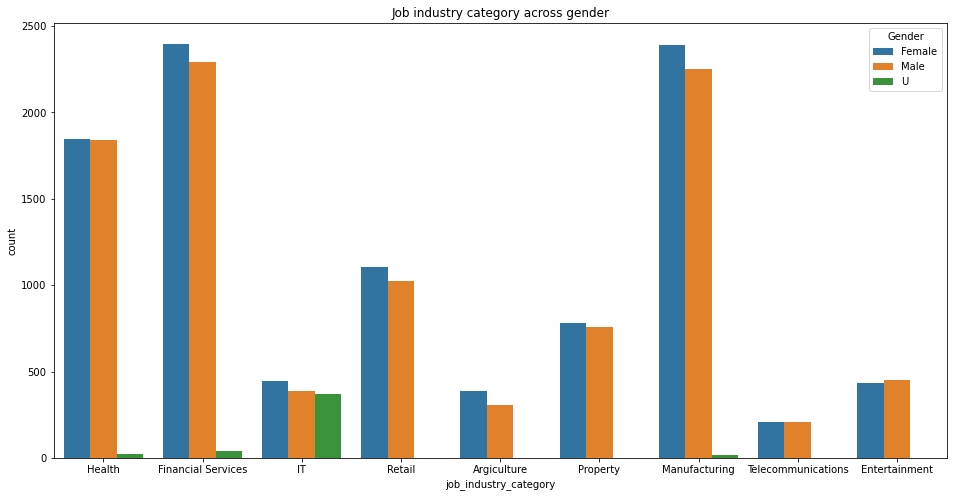

In [28]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_original.png')
plt.show()

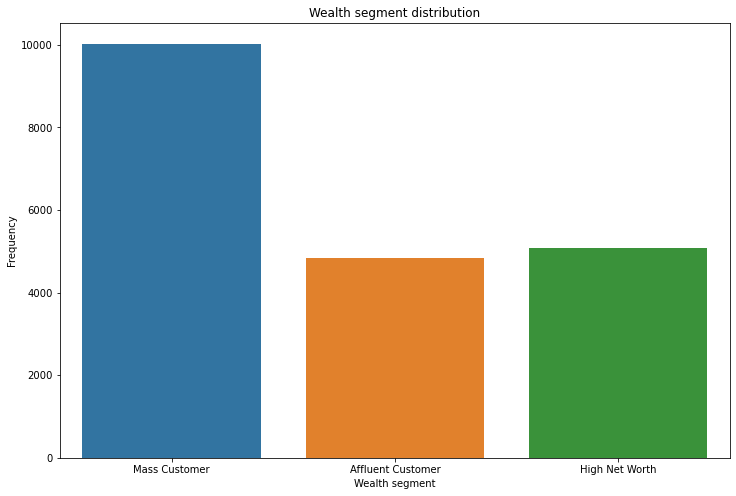

In [29]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_original.png')
plt.show()

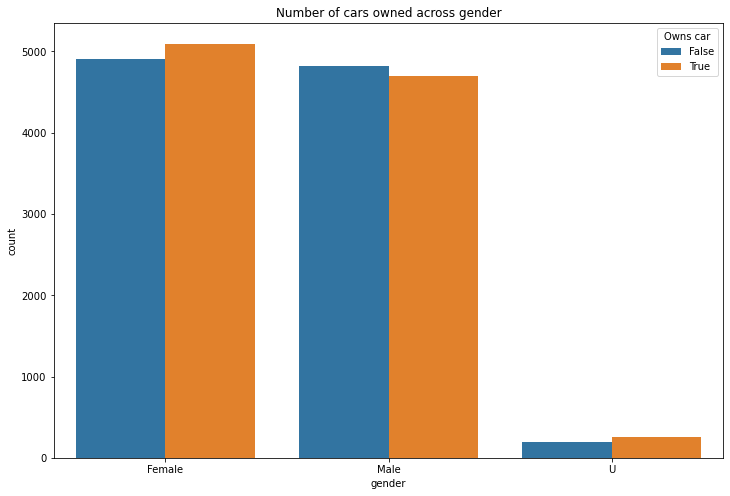

In [30]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df, hue='owns_car')
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_original.png')
plt.show()

<Figure size 864x576 with 0 Axes>

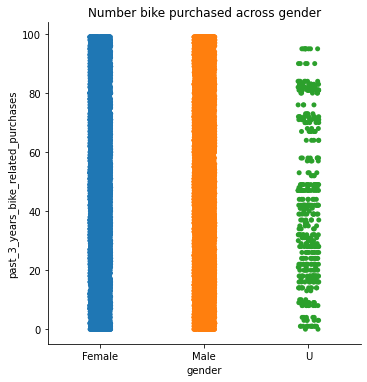

In [31]:
plt.figure(figsize = (12,8))
sn.catplot(data=df, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.savefig('bike_purchase_original.png')
plt.show()

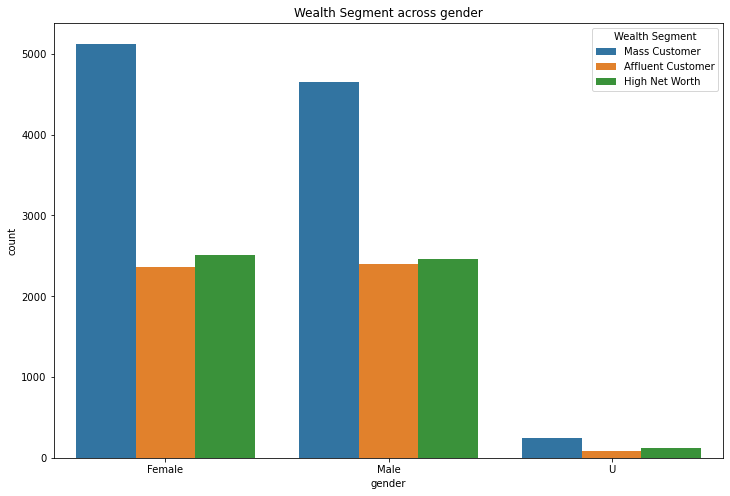

In [32]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
plt.savefig('wealth_segment-gender_original.png')
plt.show()

<Figure size 1152x576 with 0 Axes>

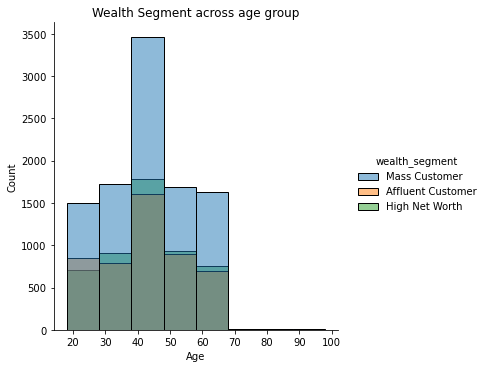

In [33]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_original.png')
plt.show()

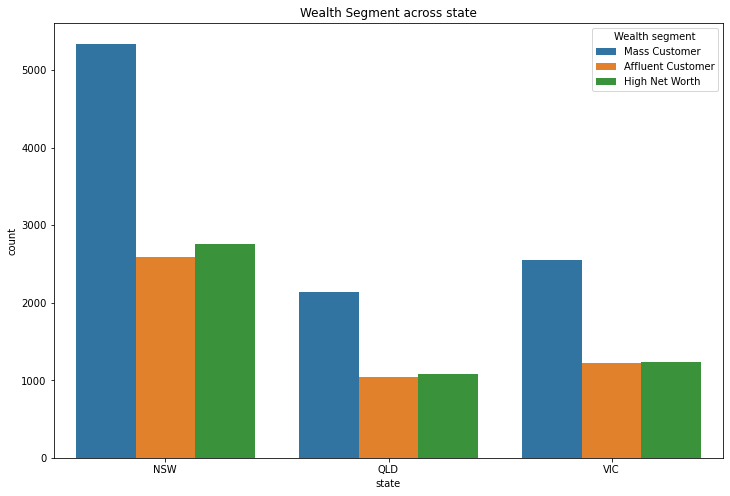

In [34]:
plt.figure(figsize = (12,8))
sn.countplot(x='state', data=df, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
plt.savefig('wealth_segment-state_original.png')
plt.show()

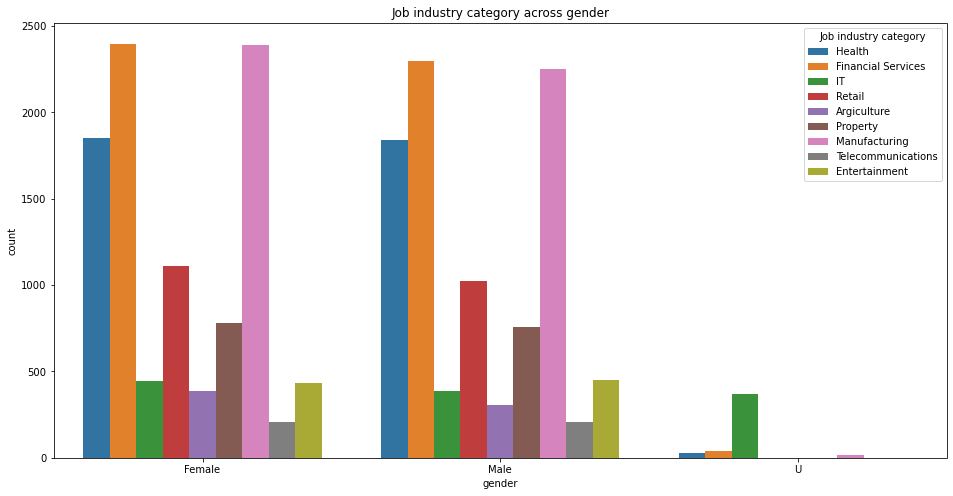

In [79]:
plt.figure(figsize=(16,8))
sn.countplot(x='gender', data=df, hue='job_industry_category', order = df['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_original.png')
plt.show()

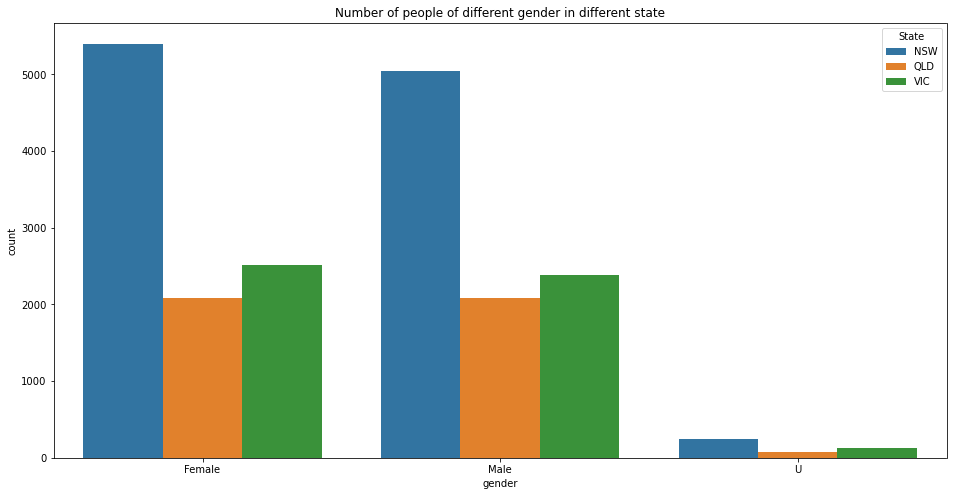

In [36]:
plt.figure(figsize = (16,8))
sn.countplot(x='gender', data=df, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people of different gender in different state')
plt.savefig('state-gender_original.png')
plt.show()

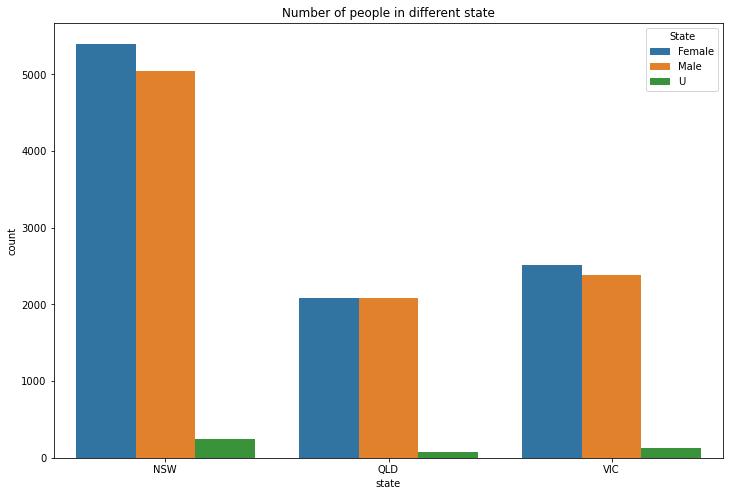

In [37]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df, hue = 'gender')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people in different state')
plt.savefig('gender-state_original.png')
plt.show()

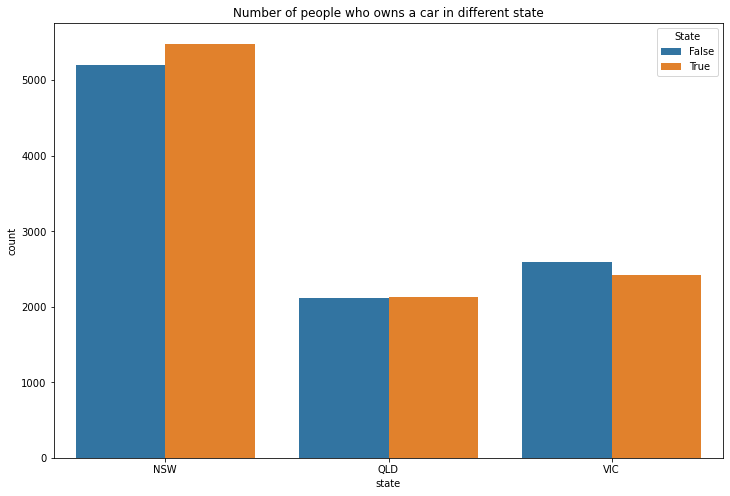

In [38]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df, hue = 'owns_car')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people who owns a car in different state')
plt.savefig('owns_car-state_original.png')
plt.show()

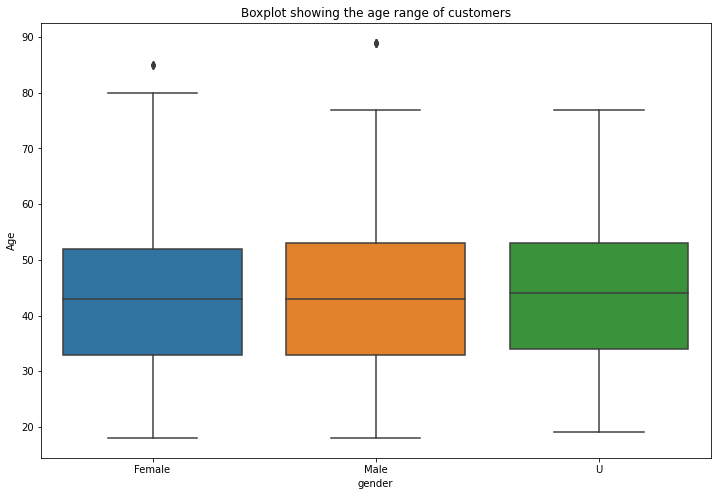

In [39]:
plt.figure(figsize = (12,8))
sn.boxplot(x = df['gender'], y = df['Age'])
plt.title('Boxplot showing the age range of customers')
plt.savefig('age_boxplot_original.png')
plt.show()

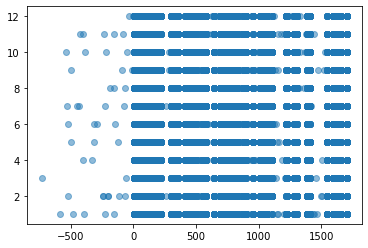

In [40]:
plt.scatter(df['profit'], df['transaction_month'], alpha=0.5)
colors=np.random.rand()
plt.show()

In [41]:
df2 = csv4

In [42]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value
0,Chickie,Brister,Male,86,12/07/1957,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719
1,Morly,Genery,Male,69,22/03/1970,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719
2,Ardelis,Forrester,Female,10,28/08/1974,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719
3,Lucine,Stutt,Female,64,28/01/1979,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703
4,Melinda,Hadlee,Female,34,21/09/1965,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,07/10/1959,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374
996,Burk,Wortley,Male,22,17/10/2001,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357
997,Melloney,Temby,Female,17,05/10/1954,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357
998,Dickie,Cubbini,Male,30,17/12/1952,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   first_name                           1000 non-null   object 
 1   last_name                            1000 non-null   object 
 2   gender                               1000 non-null   object 
 3   past_3_years_bike_related_purchases  1000 non-null   int64  
 4   dob                                  983 non-null    object 
 5   job_title                            1000 non-null   object 
 6   job_industry_category                1000 non-null   object 
 7   wealth_segment                       1000 non-null   object 
 8   deceased_indicator                   1000 non-null   object 
 9   owns_car                             1000 non-null   object 
 10  tenure                               1000 non-null   int64  
 11  address                        

In [44]:
df2.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,rank,value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,498.819000,0.881722
std,27.796686,5.037145,848.895767,2.758804,288.810997,0.293550
min,0.000000,0.000000,2000.000000,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,250.000000,0.649500
50%,51.000000,11.000000,2800.000000,8.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1000.000000,1.719000


In [45]:
df2.duplicated().sum()

0

In [46]:
df2.isnull().sum()

first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
dob                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
rank                                    0
value                                   0
dtype: int64

In [47]:
df2['new_id'] = df2.index

In [48]:
df2['dob'] = pd.to_datetime(df2['dob'], errors='coerce')

In [49]:
df2.dtypes

first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
dob                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
owns_car                                       object
tenure                                          int64
address                                        object
postcode                                        int64
state                                          object
country                                        object
property_valuation                              int64
rank                                            int64
value                                         float64
new_id                      

In [50]:
df2['dob'] = df2['dob'].apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')

In [51]:
df2['dob'].astype('datetime64')

0     1957-12-07
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-07-10
996   2001-10-17
997   1954-05-10
998   1952-12-17
999   1955-02-10
Name: dob, Length: 1000, dtype: datetime64[ns]

In [52]:
df2['dob'] = df2['dob'].fillna(df2['dob'].mode())

In [53]:
ref_date2 = dt.datetime.now()
df2['Age'] = df2['dob'].apply(lambda x: len(pd.date_range(start = x, end = ref_date2, freq = 'Y')) if str(x) else None)

In [54]:
df2

,first_name,last_name,gender,past_3_years_bike_related_purchases,dob,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,rank,value,new_id,Age
0,Chickie,Brister,Male,86,1957-12-07,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.719,0,63.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.719,1,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.719,2,46.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703,3,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703,4,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-07-10,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374,995,61.0
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357,996,19.0
997,Melloney,Temby,Female,17,1954-05-10,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357,997,66.0
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357,998,68.0


In [55]:
df2 = df2[df2.Age < 100]

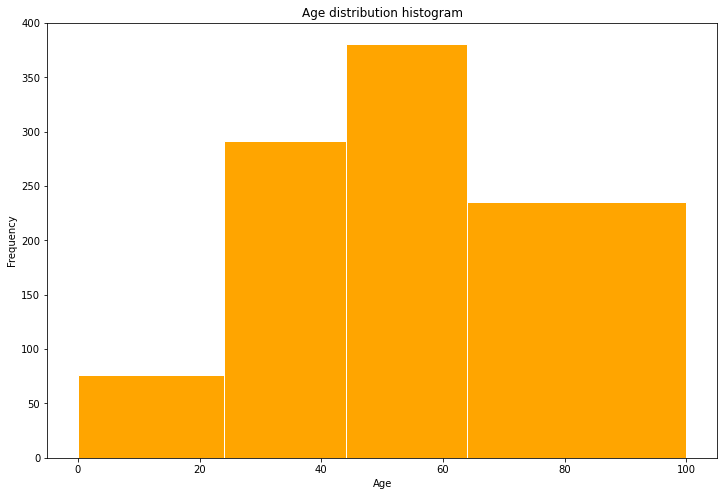

In [56]:
#Data visualisation
plt.figure(figsize = (12,8))
plt.hist(df2['Age'], color = 'orange', edgecolor = 'white', bins=[0,24,44,64,100])
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_dist_histogram2.png')
plt.show()

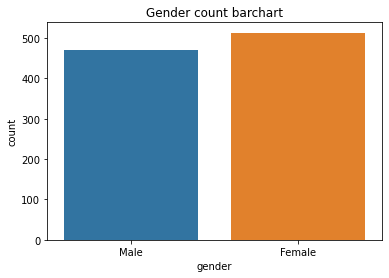

In [57]:
sn.countplot(x = 'gender', data = df2)
plt.title('Gender count barchart')
plt.savefig('gender_count_new.png')
plt.show()

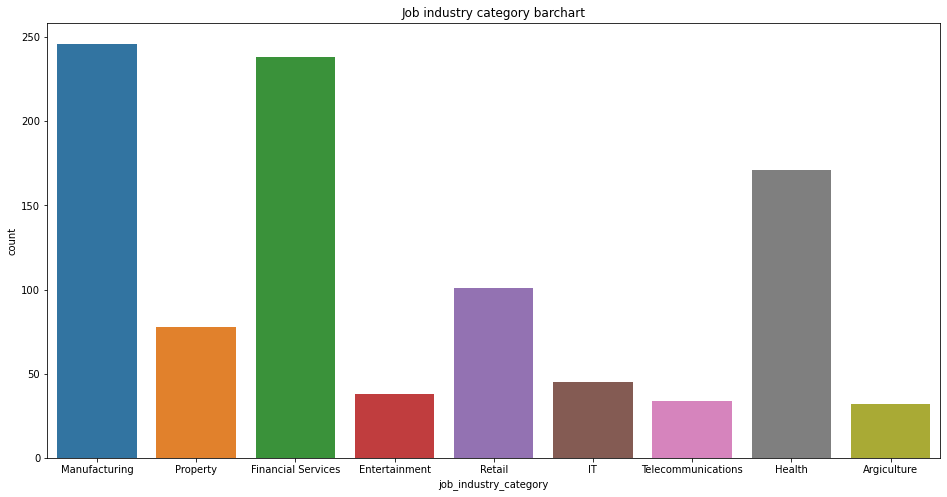

In [58]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data = df2)
plt.title('Job industry category barchart')
plt.savefig('job_industry_new.png')
plt.show()

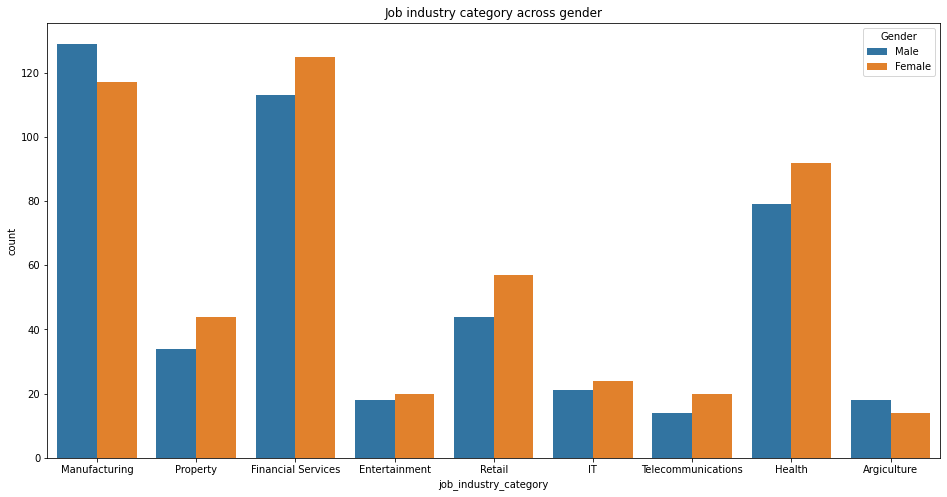

In [59]:
plt.figure(figsize = (16,8))
sn.countplot(x='job_industry_category', data=df2, hue='gender')
plt.legend(title='Gender', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_new.png')
plt.show()

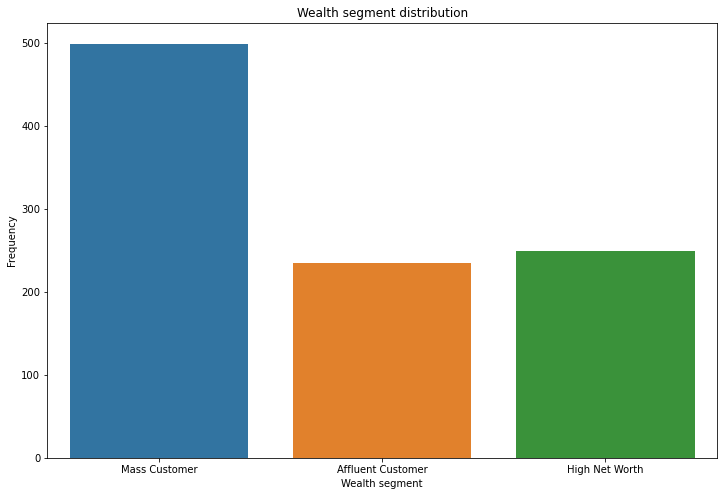

In [60]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'wealth_segment', data = df2)
plt.title('Wealth segment distribution')
plt.xlabel('Wealth segment')
plt.ylabel('Frequency')
plt.savefig('wealth_segment_new.png')
plt.show()

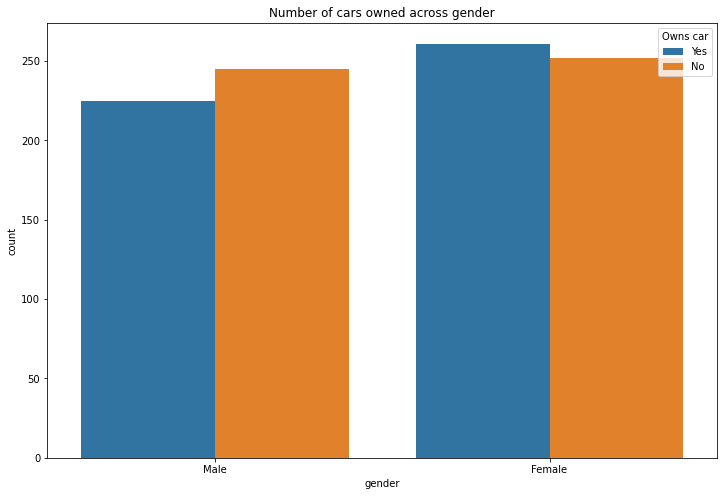

In [61]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df2, hue='owns_car')
plt.legend(title='Owns car', loc='upper right', fancybox=True)
plt.title('Number of cars owned across gender')
plt.savefig('owns_car_new.png')
plt.show()

<Figure size 864x576 with 0 Axes>

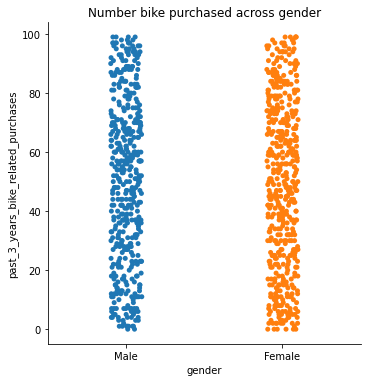

In [62]:
plt.figure(figsize = (12,8))
sn.catplot(data=df2, x='gender', y='past_3_years_bike_related_purchases')
plt.title('Number bike purchased across gender')
plt.savefig('bike_purchase_new.png')
plt.show()

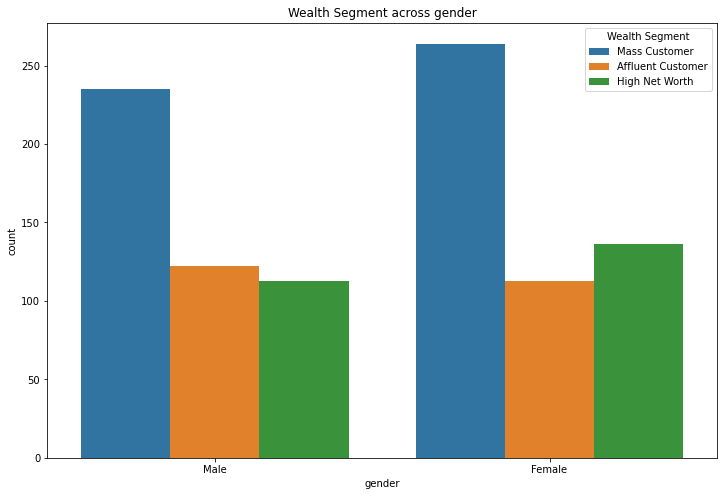

In [63]:
plt.figure(figsize = (12,8))
sn.countplot(x='gender', data=df2, hue='wealth_segment')
plt.legend(title='Wealth Segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across gender')
plt.savefig('wealth_segment-gender_new.png')
plt.show()

<Figure size 1152x576 with 0 Axes>

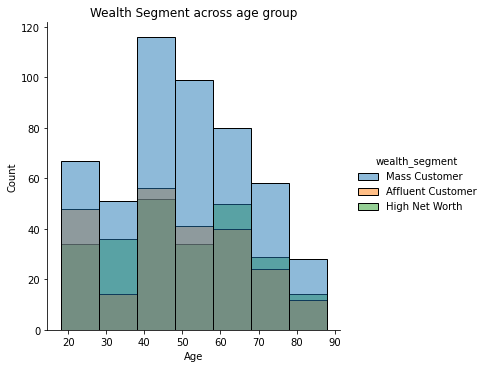

In [64]:
plt.figure(figsize = (16,8))
sn.displot(x='Age', binwidth=10, data=df2, hue='wealth_segment')
plt.title('Wealth Segment across age group')
plt.savefig('wealth_segment-age_new.png')
plt.show()

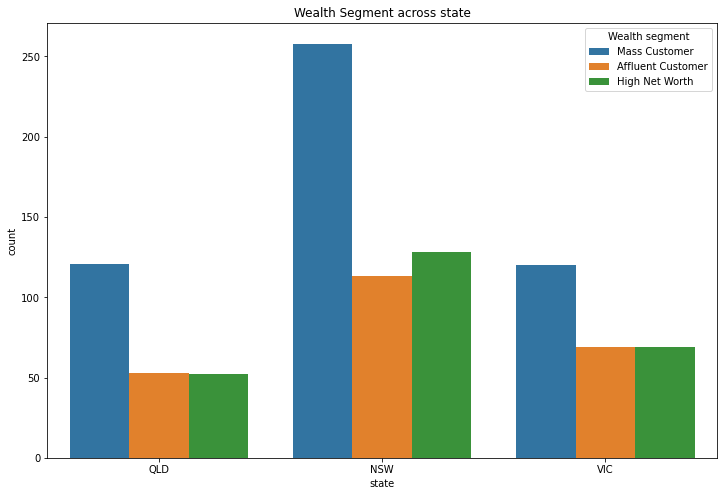

In [65]:
plt.figure(figsize = (12,8))
sn.countplot(x='state', data=df2, hue='wealth_segment')
plt.legend(title='Wealth segment', loc='upper right', fancybox=True)
plt.title('Wealth Segment across state')
plt.savefig('wealth_segment-state_new.png')
plt.show()

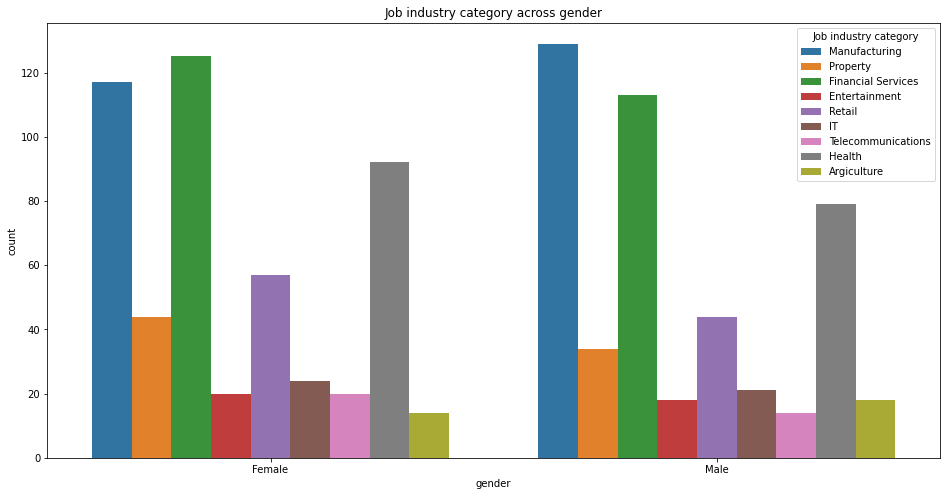

In [80]:
plt.figure(figsize=(16,8))
sn.countplot(x='gender', data=df2, hue='job_industry_category', order = df2['gender'].value_counts().index)
plt.legend(title='Job industry category', loc='upper right', fancybox=True)
plt.title('Job industry category across gender')
plt.savefig('job_industry-gender_new.png')
plt.show()

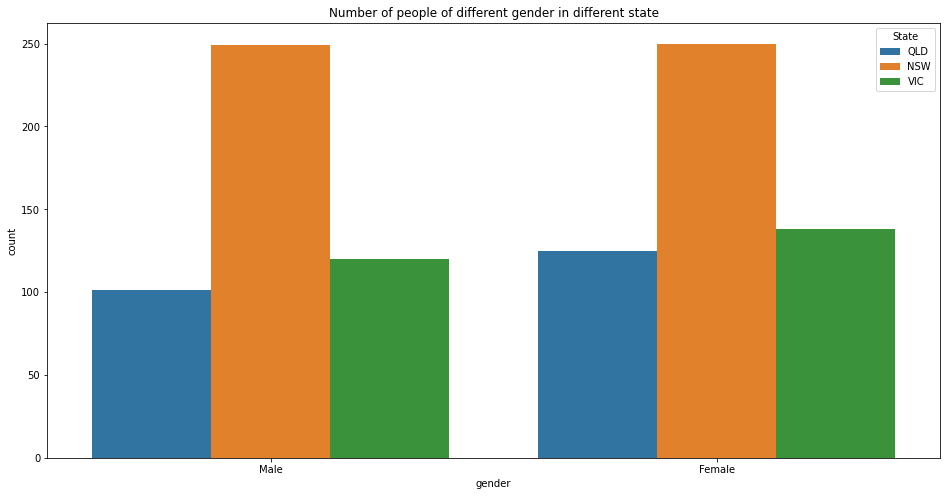

In [67]:
plt.figure(figsize = (16,8))
sn.countplot(x='gender', data=df2, hue='state')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people of different gender in different state')
plt.savefig('state-gender_new.png')
plt.show()

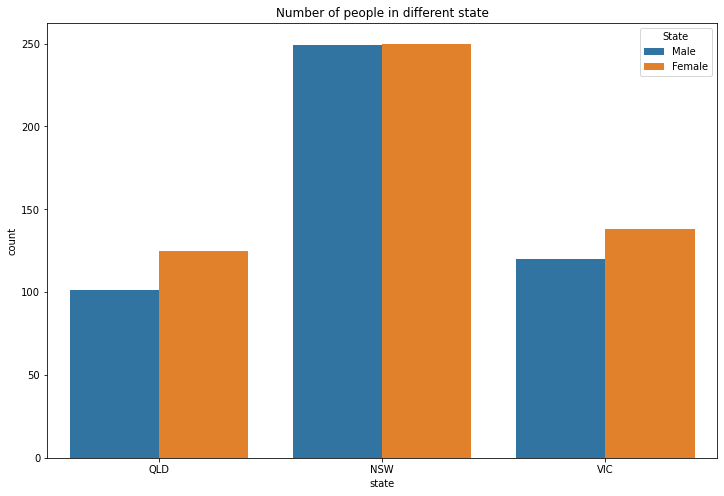

In [68]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df2, hue = 'gender')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people in different state')
plt.savefig('gender-state_new.png')
plt.show()

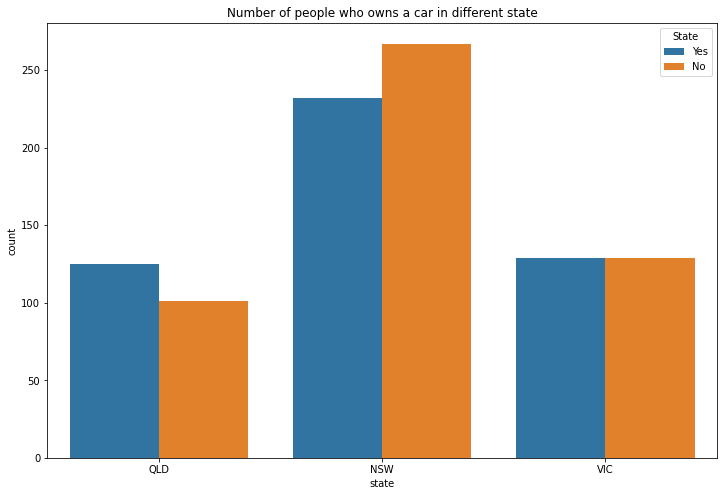

In [69]:
plt.figure(figsize = (12,8))
sn.countplot(x = 'state', data = df2, hue = 'owns_car')
plt.legend(title='State', loc='upper right', fancybox=True)
plt.title('Number of people who owns a car in different state')
plt.savefig('owns_car-state_new.png')
plt.show()

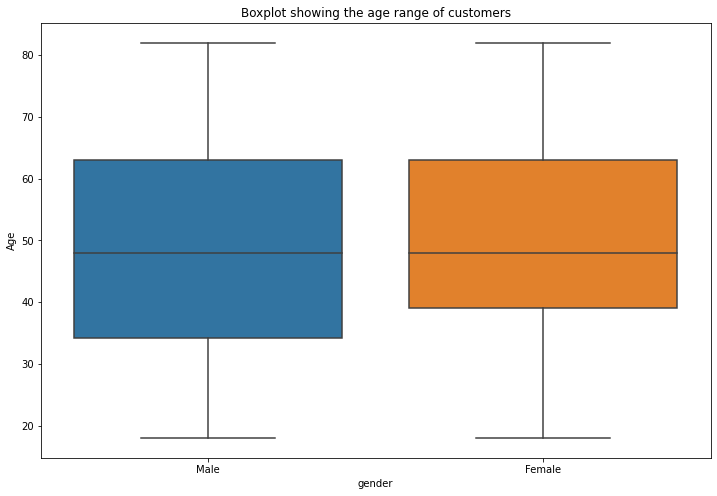

In [70]:
plt.figure(figsize = (12,8))
sn.boxplot(x = df2['gender'], y = df2['Age'])
plt.title('Boxplot showing the age range of customers')
plt.savefig('age_boxplot_new.png')
plt.show()